# Решающие деревья

## Теоретическая часть

### Предсказания в решающих деревьях

**Вспомнить из лекции**:
* Что такое решающее дерево? 
* Что представляет собой предикат? Какие бывают предикаты? Какие предикаты чаще всего используются? 
* В чем отличие внутренних и листовых вершин решающего дерева?
* Как выполнить предсказание с помощью решающего дерева в задачах многоклассовой классификации и регрессии?

**Ваш ответ**:
* Решающее дерево - это модель обучения, имеющая древовидную структуру, в которой каждый узел представляет собой тест на значение одного из признаков объекта, а каждое ребро - возможный результат этого теста.

* Предикат - это логическое выражение, которое яляется рещающим правилом. Предикаты бывают: пороговые, линейные, бинарные и т.д. Чаще всего используются пороговые предикаты.

* Листовая вершина не требует дальнейшего разделения и в ней содержится прогноз, а во внутренней лежит предикат, выполняющий разделение.

* Используя признак объекта, определяем удовлетворяет ли он порог, далее спускаемся вниз и повторяем действия и так до конца дерева.

**На что обратить внимание**:
* В линейной классификации мы рассматривали бинарную и многоклассовую классификацию отдельно, потому что предсказание и обучение выполняется по-разному для этих двух случаев. В решающих деревьях бинарная и многоклассовая классификация выполняются одинаково.
* Предсказания можно сделать для любой точки признакового пространства, то есть для любого возможного объекта, а не только для объекта обучающей выборки. 
* Признаки в предикатах различных вершин могут повторяться.

### Задача 1
Рассмотрим задачу классификации на три класса по двум признакам и следующее решающее дерево:

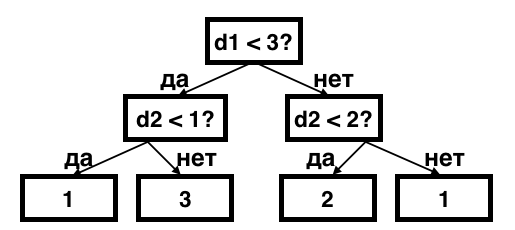

Какое предсказание это решающее дерево вернет для объекта $x=(7, 1.5)$? 

Под *d1* и *d2* подразумеваются первый и второй признак.

### Ваше решение

$d_2$ > 3 = False

$d_2$ > 1 = True

$Ответ:$ $лист$  $с$  $классом$ $2$

### Задача 2
Изобразите разделяющую поверхность для решающего дерева из предыдущей задачи.

**На что обратить внимание**: в этой задаче нет обучающей выборки, потому что предполагается, что решающее дерево уже задано, и наша задача - как бы сделать предсказания для всех возможных объектов пространства (отсюда и возникает разделяющая поверхность). Об обучении решающего дерева по конкретной выборке - материал далее.


### Ваше решение

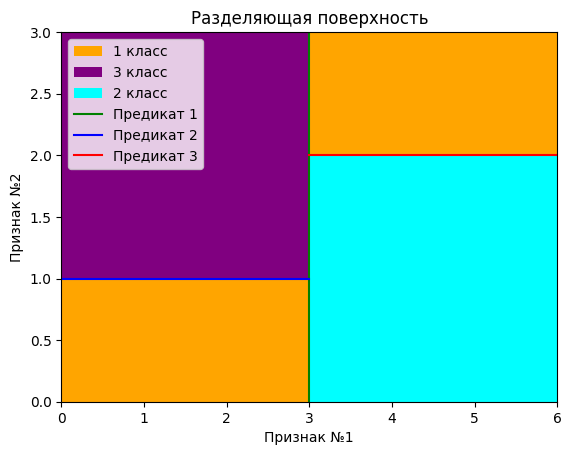

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Создаем массивы координат для предикатов
x1 = np.linspace(3, 3, 20)
y1 = np.linspace(0, 3, 20)
x2 = np.linspace(0, 3, 20)
y2 = np.linspace(1, 1, 20)
x3 = np.linspace(3, 6, 20)
y3 = np.linspace(2, 2, 20)

# Добавляем прямоугольники
rect1 = patches.Rectangle((0, 0), 3, 1, facecolor='orange', fill=True)
rect2 = patches.Rectangle((0, 1), 3, 2, facecolor='purple', fill=True)
rect3 = patches.Rectangle((3, 2), 3, 1, facecolor='orange', fill=True)
rect4 = patches.Rectangle((3, 0), 3, 2, facecolor='cyan', fill=True)

fig, ax = plt.subplots()

ax.set_xlim([0, 6])
ax.set_ylim([0, 3])

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

ax.plot(x1, y1, c='green')
ax.plot(x2, y2, c='blue')
ax.plot(x3, y3, c='red')

ax.set_title('Разделяющая поверхность')
ax.set_xlabel('Признак №1')
ax.set_ylabel('Признак №2')

ax.legend([rect1, rect2, rect4, ax.lines[0], ax.lines[1], ax.lines[2]], 
 ['1 класс', '3 класс', '2 класс', 'Предикат 1', 'Предикат 2', 'Предикат 3'], loc='upper left')

plt.show()

### Задача 3
Рассмотрим задачу регрессии по одному признаку. 

Визуализируйте решающее правило    для следующего решающего дерева:


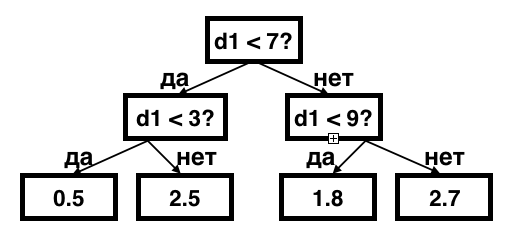

### Ваше решение

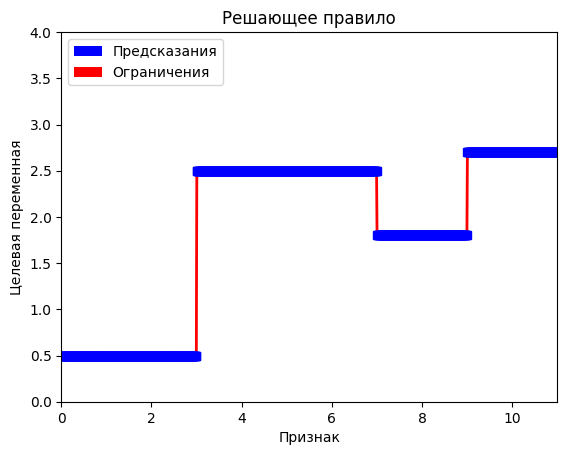

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем решающее правило
def decision_rule(x):
  if(x < 7):
    if(x < 3):
      return 0.5
    else: 
      return 2.5
  elif(x < 9):
    return 1.8
  else: 
    return 2.7 

# Формируем данные для визуализации
xx = np.linspace(0,11,1000)
yy = np.array([decision_rule(x) for x in xx])

# Визуализируем решающее правило
fig, ax = plt.subplots()
ax.set_xlim([0, 11])
ax.set_ylim([0, 4])
ax.plot(xx, yy, color='red', linewidth=2, marker='s', markeredgecolor='blue', markerfacecolor='blue')
ax.set_xlabel('Признак')
ax.set_ylabel('Целевая переменная')
ax.set_title('Решающее правило')
# Костыль для отображения легенды
rect1 = patches.Rectangle((0, 0), 3, 1, facecolor='red', fill=True)
rect2 = patches.Rectangle((0, 1), 3, 2, facecolor='blue', fill=True)
ax.legend([rect2, rect1], ['Предсказания', 'Ограничения'], loc='upper left')

Таким образом у нас получились ограничения по предикатам равные 3, 7 и 9, и линии предсказания:

$x = 0.5,$ $при$ $x<3$

$x = 2.5,$ $при$ $3<x<7$

$x = 1.8,$ $при$ $7<x<9$

$x = 2.7,$ $при$ $x>9$

### Задача 4
Приведите пример решающего дерева, которое даст нулевую ошибку в задаче классификации по двум признакам, изображенной ниже. 

Изобразите само решающее дерево, а также изобразите получающуюся разделяющую поверхность на рисунке. Используйте предикаты вида [j-й признак < t].


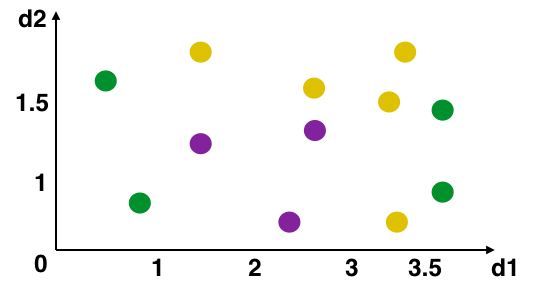

### Ваше решение

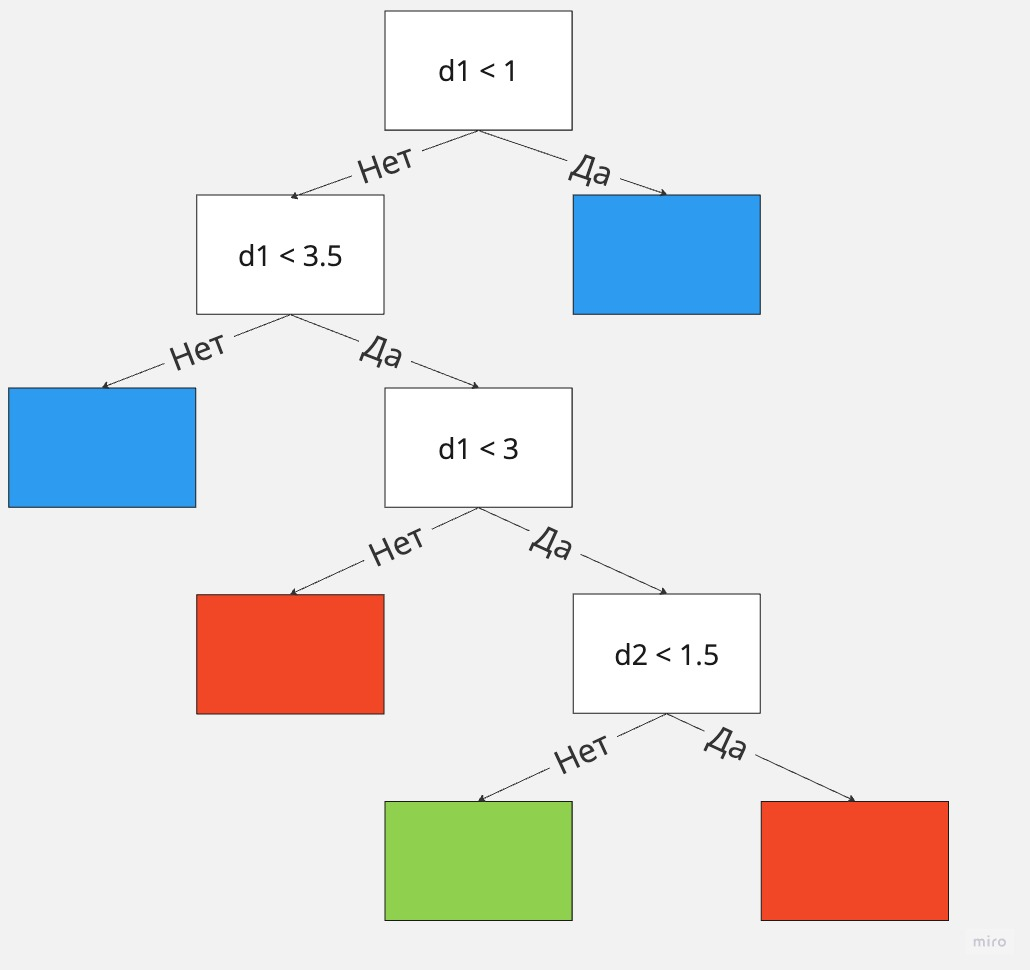

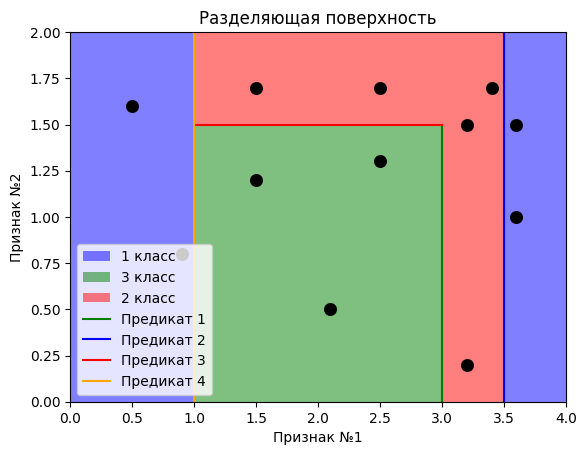

In [ ]:
# Создаем массивы координат для предикатов
x1 = np.linspace(3, 3, 20)
y1 = np.linspace(0, 1.5, 20)
x2 = np.linspace(3.5, 3.5, 20)
y2 = np.linspace(0, 2, 20)
x3 = np.linspace(1, 3, 20)
y3 = np.linspace(1.5, 1.5, 20)
x4 = np.linspace(1, 1, 20)
y4 = np.linspace(0, 2, 20)

# Добавляем прямоугольники
rect1 = patches.Rectangle((0, 0), 1, 2, facecolor='blue', fill=True, alpha=0.5)
rect2 = patches.Rectangle((1, 0), 2, 1.5, facecolor='green', fill=True, alpha=0.5)
rect3 = patches.Rectangle((3.5, 0), 0.5, 2, facecolor='blue', fill=True, alpha=0.5)
rect4 = patches.Rectangle((1, 1.5), 2, 0.5, facecolor='red', fill=True, alpha=0.5)
rect5 = patches.Rectangle((3, 0), 0.5, 2, facecolor='red', fill=True, alpha=0.5)

fig, ax = plt.subplots()

ax.set_xlim([0, 4])
ax.set_ylim([0, 2])

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)

ax.plot(x1, y1, c='green')
ax.plot(x2, y2, c='blue')
ax.plot(x3, y3, c='red')
ax.plot(x4, y4, c='orange')

# Добавляем точки
x = [0.9,0.5,3.6,3.6,1.5,2.1,2.5,2.5,3.2,3.2,3.4,1.5]
y = [0.8,1.6,1,1.5,1.2,0.5,1.3,1.7,1.5,0.2,1.7,1.7]
ax.scatter(x, y, s=70, marker='o', color='k')

ax.set_title('Разделяющая поверхность')
ax.set_xlabel('Признак №1')
ax.set_ylabel('Признак №2')

ax.legend([rect1, rect2, rect4, ax.lines[0], ax.lines[1], ax.lines[2], ax.lines[3]], 
 ['1 класс', '3 класс', '2 класс', 'Предикат 1', 'Предикат 2', 'Предикат 3', 'Предикат 4'], loc='lower left')

plt.show()


__На что обратить внимание__: подобным способом можно **для любой непротиворечивой выборки** построить решающее дерево, имеющее нулевую ошибку на этой выборке. 

Этот факт обосновывает склонность решающих деревьев к переобучению. 

Под непротиворечивостью здесь подразумевается, что в выборке нет двух объектов с одинаковыми значениями признаков, но разными значениями целевой переменной.


## Обучение решающего дерева
### Непрерывная и дискретная оптимизация

 Для обучения моделей, как правило, используются методы оптимизации. В зависимости от того, по каким переменным нужно выполнять оптимизацию, выделяют два вида оптимизации: непрерывную и дискретную. 
 
 Непрерывная оптимизация выполняется по вещественным числам, часто здесь используют градиентные методы. С помощью непрерывной оптимизации мы обучали линейные модели. 
 
 Дискретная оптимизация выполняется по конечным множествам, для этого необходимо делать перебор по элементам множества. Делать полный перебор может быть очень долго, поэтому придумывают более эффективные алгоритмы, например один из самых простых - жадный алгоритм. 
 
 С помощью жадной дискретной оптимизации мы будем обучать решающие деревья. В решающих деревьях нужно выбрать одно из всех возможных разбиений признакового пространства на области. Несмотря на то, что всего разбиений бесконечное число, разбиений, приводящих к разным предсказаниям на обучающей выборке, конечное число - между ними и нужно выбрать одно.

**Вспомнить из лекции**:
* Рекурсивный алгоритм построения решающего дерева.
* Какие вы знаете критерии останова при построении решающего дерева?
* Как выбрать, какое предсказание делать в листе для задачи регрессии и задачи классификации?

**Ваш ответ**:
* Рекурсивный алгоритм построения решающего дерева состоит из следующих шагов:
(1) выбираем предикат,
(2) создаем узел дерева согласно условию предиката,
(3) выражаем 2 выборки с помощью выбранного предиката,
рекурсивно повторяем для 2 частей, пока не выполнится критерий остановки.
* Критерии останова при построении решающего дерева могут быть разными:
(1) глубина дерева,
(2) число объектов в листе,
(3) минимального уменьшения разброса ответов при разбиении,
(4) число листьев дерева.
* Для задачи регрессии в листе дерева можно выбрать среднее значение целевой переменной для всех объектов в листе. Для задачи классификации в листе дерева можно выбрать метку класса, которая соответствует наиболее часто встречающемуся классу среди всех объектов в листе.




### Критерии информативности: интуиция
Когда мы строим одну вершину решающего дерева, мы разбиваем выборку на две подвыборки: одна подвыборка будет использоваться при построении левого поддерева, вторая - при построении правого поддерева. 

Какую цель мы преследуем, когда разбиваем выборку на две подвыборки? Каких свойств мы хотим от получающихся подвыборок? Можно придумать разные ответы, но на практике хорошо работает следующее желаемое свойство: мы хотим, чтобы ответы в обеих подвыборках были как можно менее вариативны. В идеальной ситуации в каждой подвыборке у всех объектов одинаковые ответы, и дальше строить дерево не нужно (каждая подвыборка станет листом). На практике так обычно не получается, иначе это бы уже не было задачей машинного обучения. Однако мы можем постепенно уменьшать вариативность ответов в подвыборках. 

Итак, зафиксируем следующую постановку задачи: у нас есть вектор правильных ответов $Y_v$ (ответы на всех объектах, попавших в вершину $v$), и мы хотим измерить вариативность этих ответов.

Как измерить вариативность в задаче регрессии? Для этого можно использовать среднеквадратичное отклонение:
$$H(Y_v) = \sum_{i=1}^{|Y_v|} (Y_{v, i} - \bar Y_{v})^2,$$
где $\bar Y_{v}$ - среднее вектора $Y_{v}$.
Можно выбирать аналогичные меры разброса в зависимости от функции потерь, используемой в задаче. Например, при использовании MAE можно заменить квадрат на модуль, а среднее - на медиану.

Как измерить вариативность в задаче классификации? Здесь обычно подходят следующим образом: на основе вектора $Y_v$, состоящего из меток классов $1 \dots K$, вычисляют доли каждого класса: $(p_1, \dots, p_K)$. Если все элементы вектора одинаковые (вариативность наименьшая), то среди $p_k$ будет одна 1, оостальные значения 0 (назовем это случай а). При наименьшей вариативности вектора $Y_v$ все $p_k \approx \frac 1 k$ (случай б). Осталось придумать критерий, зависящий от $(p_1, \dots, p_K)$, который минимален в случае а и максимален в случае б. Таким критерием является, например, энтропийный критерий:
$$H(Y_v) = H(p_1, \dots, p_K) = - \sum_{k=1}^K p_k \log p_k$$
или критерий Джини:
$$H(Y_v) = H(p_1, \dots, p_K) = \sum_{k=1}^K p_k (1-p_k).$$

В итоге, мы можем измерить вариативность подвыборок, из которых будет строиться левое и правое поддерево. Чтобы построить вершину $v$, мы будем перебирать все возможные признаки $j$ и все возможные пороги $t$ (всего $\ell d$ вариантов, $\ell$ - число объектов, $d$ - число признаков), для каждой пары $(j, t)$ мы получим разбиение выборки на две части, им соответствуют векторы правильных ответов $Y_\ell$ и $Y_r$. Далее нам нужно сравнить все разбиения и выбрать лучшее. Сравнивать разбиения удобно, когда есть один критерий;  у нас же пока два критерия. Скомбинируем вариативность обеих выборок в одном критерие:
$$Q(Y_v, j, t) = \frac {|Y_\ell|}{|Y_v|} H(Y_\ell) 
+ \frac {|Y_r|}{|Y_v|} H(Y_r) \rightarrow \min_{j, \,t}$$

Веса $\frac {|Y_\ell|}{|Y_v|}$ и $\frac {|Y_r|}{|Y_v|}$ вводятся для того, чтобы не поощрять отделение одного объекта в отдельную вершину: для таких подвыборок вариативность вектора правильных ответов низкая, и без перевзвешивания алгоритм всегда выбирал бы подобные разбиения. А это нежелательно, потому что вершины из одного объекта позволяют запоминать ответы, что ведет к переобучению. 

Итоговый алгоритм построения вершины: перебрать все варианты $(j, t)$, для каждого посчитать критерий $Q(Y_v, j, t)$, выбрать пару с наибольшим значением критерия.


### Задача 5
Предположим, мы решаем задачу классификации на три класса по четырем признакам и строим решающее дерево. При построении вершины $v$ мы имеем выборку из семи объектов:

| 1-й признак | 2-й признак | 3-й признак | 4-й признак | класс |
|-------------|-------------|-------------|-------------|-------|
| 5           | 8           | 8           | 2.5         | 2     |
| 3           | 3           | 7           | 7.7         | 1     |
| 6           | 7.7         | 1           | 1.1         | 3     |
| 3.3         | 1           | 2           | 1.2         | 1     |
| 24          | 3.9         | 5           | 3.9         | 1     |
| 12          | 10          | 10.1        | 8           | 2     |
| 1           | 2           | 2           | 9.1         | 1     |

Какой из предикатов лучше: [1-й признак < 6] или [3-й признак < 5] по критерию Джини?


### Ваше решение


* Для первого предиката. Первая подвыборка:    
$$H(Y_l) = \frac{3}{4} * \frac{1}{4} + \frac{3}{4} * \frac{1}{4} = \frac{3}{8}$$    
Вторая подвыборка:   
$$H(Y_r) =\frac{1}{3} * \frac{2}{3} + \frac{1}{3} * \frac{2}{3} + \frac{1}{3} * \frac{2}{3} = \frac{2}{3}$$  
Итого:      
$$Q(Y_v, j, t) = \frac{4}{7} * \frac{3}{8} + \frac{3}{7} * \frac{2}{3} = \frac{1}{2} = 0,5$$

* Для второго предиката. Первая подвыборка: 
$$H(Y_l) = \frac{2}{3} * \frac{1}{3} + \frac{1}{3} * \frac{2}{3} = \frac{4}{9}$$    
Вторая подвыборка:   
$$H(Y_r) =\frac{2}{4} * \frac{2}{4} + \frac{2}{4} * \frac{2}{4} = \frac{1}{2}$$ 
Итого:  
$$Q(Y_v, j, t) = \frac{3}{7} * \frac{4}{9} + \frac{4}{7} * \frac{1}{2} = \frac{10}{21} ≈ 0,48$$  

Таким образом, предикат [3-й признак < 5] лучше, так как он дает меньшее значение критерия Джини.


### Вопрос. Что является параметрами и гиперпараметрами решающих деревьев?


### Ваш ответ

Параметры решающих деревьев:
1. Критерий разбиения
2. Максимальная глубина дерева
3. Минимальное количество объектов в листе
4. Минимальное количество объектов для разбиения

Гиперпараметры решающих деревьев:
1. Количество деревьев в случайном лесу
2. Максимальное количество признаков для разбиения
3. Минимальное количество объектов для создания нового узла
4. Максимальное количество объектов в листе

Первое задание:

Для решения этой задачи нужно пройти по решающему дереву, начиная с корневого узла и двигаясь вниз в зависимости от значений признаков объекта $x$.

В данном случае, корневой узел проверяет значение признака $d1$. Если $d1 \leq 5$, то переходим в левое поддерево, иначе - в правое.

В левом поддереве следующий узел проверяет значение признака $d2$. Если $d2 \leq 1$, то объект $x$ относится к классу 1.

В правом поддереве следующий узел проверяет значение признака $d2$. Если $d2 \leq 2$, то объект $x$ относится к классу 2, иначе - к классу 3.

Таким образом, для объекта $x=(7, 1.5)$ решающее дерево вернет предсказание, что он относится к классу 2.

Второе задание:

Для того, чтобы выбрать лучший предикат, нам нужно посчитать критерий Джини для каждого разбиения выборки на две подвыборки.

Разобьем выборку на две подвыборки в соответствии с предикатами [1-й признак < 6] и [3-й признак < 5]. Получим следующие подвыборки:

| 1-й признак | 2-й признак | 3-й признак | 4-й признак | класс |
|-------------|-------------|-------------|-------------|-------|
| 5 | 8 | 8 | 2.5 | 2 |
| 3 | 3 | 7 | 7.7 | 1 |
| 3.3 | 1 | 2 | 1.2 | 1 |
| 1 | 2 | 2 | 9.1 | 1 |

и

| 1-й признак | 2-й признак | 3-й признак | 4-й признак | класс |
|-------------|-------------|-------------|-------------|-------|
| 6 | 7.7 | 1 | 1.1 | 3 |
| 24 | 3.9 | 5 | 3.9 | 1 |
| 12 | 10 | 10.1 | 8 | 2 |

Для первой подвыборки доли классов равны $(\frac{3}{4}, \frac{1}{4}, 0)$, а для второй - $(\frac{1}{3}, 0, \frac{2}{3})$. Посчитаем критерий Джини для каждой подвыборки:

$$H(Y_{\ell}) = H(\frac{3}{4}, \frac{1}{4}, 0) = \frac{3}{4} \cdot (1 - \frac{3}{4}) + \frac{1}{4} \cdot (1 - \frac{1}{4}) = \frac{3}{8}$$

$$H(Y_{r}) = H(\frac{1}{3}, 0, \frac{2}{3}) = \frac{1}{3} \cdot (1 - \frac{1}{3}) + \frac{2}{3} \cdot (1 - \frac{2}{3}) = \frac{2}{9}$$

Теперь посчитаем критерий Джини для разбиения по предикату [1-й признак < 6]:

$$Q(Y_v, 1, 6) = \frac{4}{7} H(Y_{\ell}) + \frac{3}{7} H(Y_{r}) = \frac{4}{7} \cdot \frac{3}{8} + \frac{3}{7} \cdot \frac{2}{9} \approx 0.238$$

Аналогично, посчитаем критерий Джини для разбиения по предикату [3-й признак < 5]:

$$Q(Y_v, 3, 5) = \frac{3}{7} H(Y_{\ell}) + \frac{4}{7} H(Y_{r}) = \frac{3}{7} \cdot \frac{3}{8} + \frac{4}{7} \cdot \frac{2}{9} \approx 0.238$$

Таким образом, оба предиката дают одинаковое значение критерия Джини, и мы можем выбрать любой из них.